In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk 
import string
import csv

from textblob import TextBlob
from collections import Counter
import operator
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Plotly Tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
init_notebook_mode(connected=True)
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint
import time as ti
from IPython import display

In [ ]:
!wget -O dataset_combined_uncleaned.csv https://raw.githubusercontent.com/godhi06/TA/master/data/dataset_combined_uncleaned.csv



df_ori = pd.read_csv('dataset_combined_uncleaned.csv', index_col=0)

--2020-08-03 04:20:22--  https://raw.githubusercontent.com/godhi06/TA/master/data/dataset_combined_uncleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 223725 (218K) [text/plain]
Saving to: ‘dataset_combined_uncleaned.csv’

dataset_combined_un 100%[===================>] 218.48K  --.-KB/s    in 0.03s   

2020-08-03 04:20:22 (7.33 MB/s) - ‘dataset_combined_uncleaned.csv’ saved [223725/223725]



In [ ]:
df_ori

,text,label
0,I've had major depressive disorder for many y...,1
1,One of my friends lost his brother to suicide...,1
2,My long distance boyfriend sent me flowers for...,0
3,I was recently diagnosed with GAD (Generalize...,1
4,"After 4 years my hair is finally healed, & lif...",0
...,...,...
652,I wish I could shake this. I don't laugh or j...,1
653,Hereâs a picture of grass smiling to brighte...,0
654,"In his videos about self injury, not only doe...",1
655,Sometimes I feel like what happened to me isn...,1


In [ ]:
df_ori_dep = df_ori[df_ori.label == 1]

print("Banyak data depresi:", len(df_ori_dep))

Banyak data depresi: 340


In [ ]:
df_ori_dep

,text,label,polarity,text_len,word_count
0,I've had major depressive disorder for many y...,1,0.008167,642,127
1,One of my friends lost his brother to suicide...,1,-0.001190,574,111
3,I was recently diagnosed with GAD (Generalize...,1,0.185707,547,102
5,Does anyone know when the proper time is to g...,1,0.058333,305,58
9,I don't know what to do now. My only coping m...,1,-0.075000,221,40
...,...,...,...,...,...
651,"Just carved DECAY into my lower thigh, near m...",1,-0.203571,606,110
652,I wish I could shake this. I don't laugh or j...,1,0.246429,239,47
654,"In his videos about self injury, not only doe...",1,-0.132950,1203,206
655,Sometimes I feel like what happened to me isn...,1,-0.047917,305,58


In [ ]:
df_ori_dep['polarity'] = df_ori_dep['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df_ori_dep['text_len'] = df_ori_dep['text'].astype(str).apply(len)
df_ori_dep['word_count'] = df_ori_dep['text'].apply(lambda x: len(str(x).split()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Text(0.5, 1.0, 'Distribusi banyak kata pada post Sebelum Praproses')

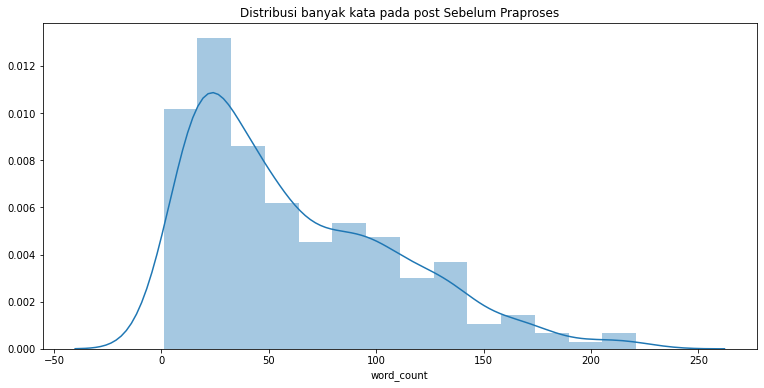

In [ ]:
# Plot the distribution of word count
plt.figure(figsize=(12.8,6))
sns.distplot(df_ori['word_count']).set_title('Distribusi banyak kata pada post Sebelum Praproses')



In [ ]:
df_ori_dep.loc[df_ori['word_count'] <= 10]

,text,label,polarity,text_len,word_count
92,I feel like i'm the only one.,1,0.000000,30,7
157,How does alcohol affect your PTSD?,1,0.000000,35,6
212,I feel so alone. And worthless. I cant.,1,-0.800000,40,8
306,I really need to talk to someone,1,0.200000,33,7
529,I dont want to live anymore.,1,0.136364,29,6


In [ ]:
def buildUnigramModel(Text):
    words = []
    
    for i, txt in enumerate(Text):
        simbol = '[–—"!@#$%()&+,./;:=“”\\0123456789‘\[\]-]<>*?^`~'
        clean_text = txt
        for smb in simbol:
            clean_text = clean_text.replace(str(smb),'')
        
        words.append(clean_text.lower().split())
    
    words = np.concatenate(words)
    words_count = Counter(words)
    unigramModel = dict(words_count)
    return unigramModel

In [ ]:

# Function to get top unigram with stopword
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to get top unigram without stopword
def get_top_n_words_sw(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:

depresiUnigram = buildUnigramModel(df_ori_dep['text'])
sorted_depresiUnigram = dict(sorted(depresiUnigram.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
# show top 20 unigram
common_words = get_top_n_words(df_ori_dep['text'], 50)

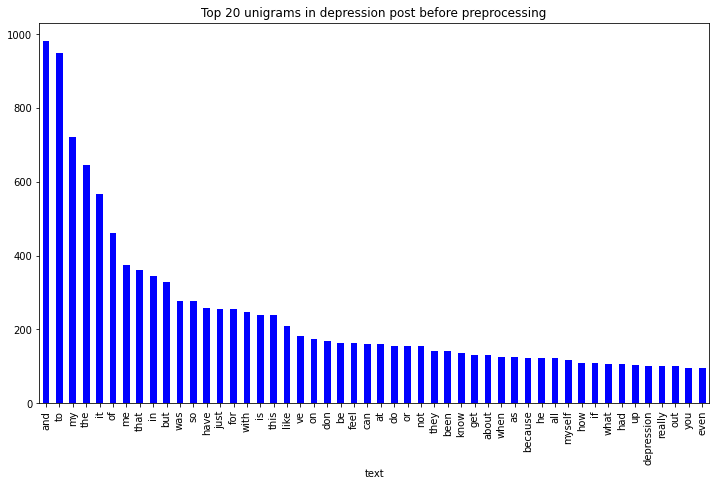

In [ ]:
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 unigrams in depression post before preprocessing', figsize=(12,7))

In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
    
    
    #converting coefficient matrix from sparse to dense and then unravelling it
    coef = np.ravel(classifier.coef_.reshape(-1, 1).todense())
    #getting the top n positive coefficients
    tpc = np.argsort(coef)[-top_features:]
    #getting the top n negative coefficients
    tnc = np.argsort(coef)[:top_features]
    #stacking them to form one array of top positive and negative coefficients
    top_coefficients = np.hstack([tnc, tpc])
    # creating plot
    plt.figure(figsize=(15, 5))
    #assigning color labels
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    #plotting data
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha = 'right')
    plt.xlabel("Feature Names")
    plt.ylabel("Linear SVM Coefficient")
    plt.show()

In [ ]:

!wget -O crawlManual.csv https://raw.githubusercontent.com/godhi06/Dataset-Depresi/master/crawlManual.csv
!wget -O happy.csv https://raw.githubusercontent.com/godhi06/Dataset-Depresi/master/happy.csv

dfDepresi = pd.read_csv('crawlManual.csv', delimiter=';', header=None, names=['username','text','na_text'])
dfNonDepresi = pd.read_csv('happy.csv',encoding='latin-1', header=0, index_col=0, names=['title','text'])

--2020-04-22 12:05:05--  https://raw.githubusercontent.com/godhi06/Dataset-Depresi/master/crawlManual.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174948 (171K) [text/plain]
Saving to: ‘crawlManual.csv’

crawlManual.csv     100%[===================>] 170.85K  --.-KB/s    in 0.04s   

2020-04-22 12:05:05 (3.89 MB/s) - ‘crawlManual.csv’ saved [174948/174948]

--2020-04-22 12:05:09--  https://raw.githubusercontent.com/godhi06/Dataset-Depresi/master/happy.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113352 (111K) [text/plain]
Savi

In [ ]:
# Refilter Depression and Non Depression DataFrame
dfDepresi = dfDepresi.loc[:349,:]
dfNonDepresi = dfNonDepresi.loc[2:,:]

Depresi dataframe








In [ ]:
# Find non-NA value in na_text columns
im_text = list(dfDepresi[dfDepresi['na_text'].isnull() == False].index.tolist())

# Merge non-NA in na_text column to text column
for i in range (0,len(im_text)):
  dfDepresi.iloc[im_text[i]].text += dfDepresi.iloc[im_text[i]].na_text

# Find non username value in username column
kosong = dfDepresi[dfDepresi['text'].apply(lambda x: isinstance(x, str)==False)]

# Move the non username value in username columns to text column in the previous row
dfDepresi.iloc[kosong.index[0] - 1].text += " " + dfDepresi.iloc[kosong.index[0]].username

# Drop empty rows
dfDepresi = dfDepresi.drop(20)

Non depresi dataframe

In [ ]:

# Find index from NA value in text column
idx_kosong = list(dfNonDepresi[dfNonDepresi['text'].isnull() == True].index.tolist())

# Fill NA text columns with the title column from the respective row
for i in range (0,len(idx_kosong)):
  dfNonDepresi.loc[idx_kosong[i],'text'] = dfNonDepresi.loc[idx_kosong[i],'title']

In [ ]:

# Slice dataframe by only taking username and text columns only
dfDepresi = dfDepresi.loc[:,['username', 'text']]

Membuat word count, textlenght, polarity pada depresi daataframe

In [ ]:
dfDepresi['polarity'] = dfDepresi['text'].map(lambda text: TextBlob(text).sentiment.polarity)
dfDepresi['text_len'] = dfDepresi['text'].astype(str).apply(len)
dfDepresi['word_count'] = dfDepresi['text'].apply(lambda x: len(str(x).split()))

Distribusi pada textlength

Text(0.5, 1.0, 'Distribusi Panjang Post Sebelum Praproses')

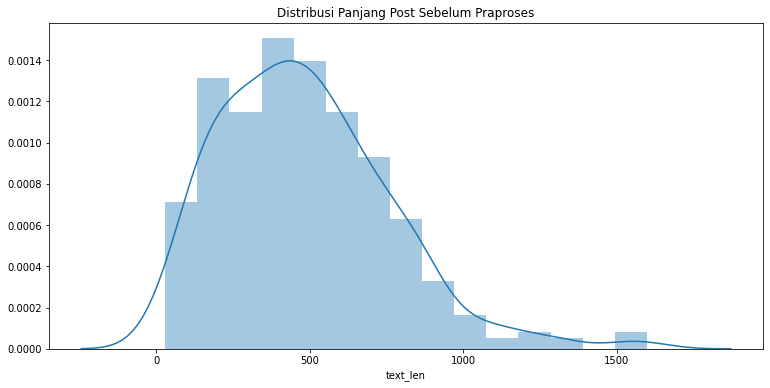

In [ ]:
# Plot the distribution of text length
plt.figure(figsize=(12.8,6))
sns.distplot(dfDepresi['text_len']).set_title('Distribusi Panjang Post Sebelum Praproses')

Berdasarkan distribusi data diatas, maka dapat dilihat bahwa ada text length diluar distribusi persebaran yakni pada range +-1500 keatas

In [ ]:
dfDepresi.loc[(dfDepresi['text_len'] < 1500) & (dfDepresi['text_len'] >= 1300)]

,username,text,polarity,text_len,word_count
329,FinnsChips,I was in a doctor who merch shop in the outsk...,-0.031333,1316,255
343,FinnsChips,"Well, first time in a normal social environme...",0.033990,1318,268


Menghapus post yang text lengthnya lebih dari 1300

In [ ]:

dfDepresi = dfDepresi.loc[dfDepresi['text_len'] < 1300]

In [ ]:

print("Banyak data setelah diseleksi berdasarkan panjang teks: ", len(dfDepresi))

Banyak data setelah diseleksi berdasarkan panjang teks:  344


Distribusi pada word count

Text(0.5, 1.0, 'Distribusi banyak kata pada post Sebelum Praproses')

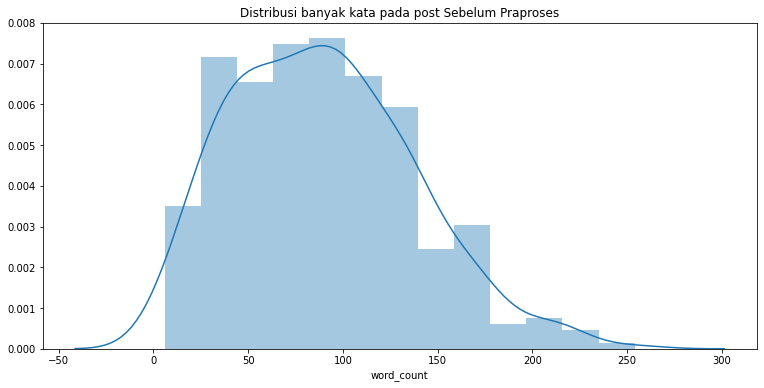

In [ ]:
# Plot the distribution of word count
plt.figure(figsize=(12.8,6))
sns.distplot(dfDepresi['word_count']).set_title('Distribusi banyak kata pada post Sebelum Praproses')



In [ ]:
print("Banyak data sebelum diseleksi berdasarkan panjang teks: ", len(dfDepresi))

Banyak data sebelum diseleksi berdasarkan panjang teks:  344


In [ ]:
dfDepresi.loc[dfDepresi['word_count'] >= 250]

,username,text,polarity,text_len,word_count
338,FinnsChips,Sometimes I'll just look at my body and reali...,-0.133965,1275,254


MenghaPus post pada word lebih dari 250


In [ ]:
dfDepresi = dfDepresi.loc[dfDepresi['word_count'] < 250]

In [ ]:

print("Banyak data setelah diseleksi berdasarkan panjang teks: ", dfDepresi.shape[0])

Banyak data setelah diseleksi berdasarkan panjang teks:  343


Distribusi sentiment polarity score

Text(0.5, 1.0, 'Distribusi polaritas pada post Sebelum Praproses')

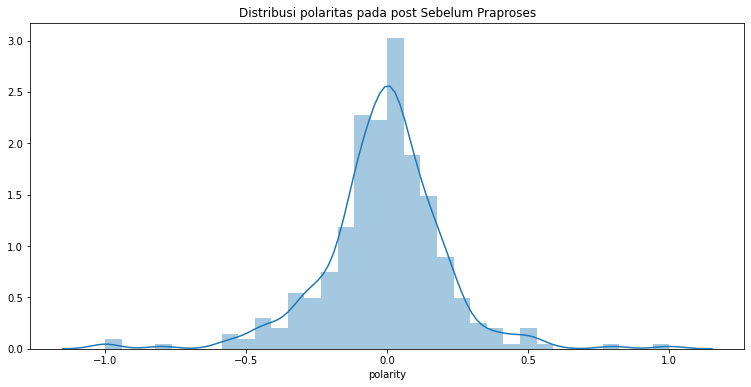

In [ ]:
# Plot the distribution of sentiment polarity score
plt.figure(figsize=(12.8,6))
sns.distplot(dfDepresi['polarity']).set_title('Distribusi polaritas pada post Sebelum Praproses')

Menghapus data pada polarity kebih dari 0.5

In [ ]:
dfDepresi = dfDepresi[(dfDepresi['polarity'] <= 0.5)]

In [ ]:
print("Banyak data setelah diseleksi berdasarkan panjang teks: ", len(dfDepresi))

Banyak data setelah diseleksi berdasarkan panjang teks:  340


Membuat word count, textlenght, polarity pada non depresi daataframe

In [ ]:
dfNonDepresi['polarity'] = dfNonDepresi['text'].map(lambda text: TextBlob(text).sentiment.polarity)
dfNonDepresi['text_len'] = dfNonDepresi['text'].astype(str).apply(len)
dfNonDepresi['word_count'] = dfNonDepresi['text'].apply(lambda x: len(str(x).split()))

Distribusi setiap post length

Text(0.5, 1.0, 'Distribusi panjang post Sebelum Praproses')

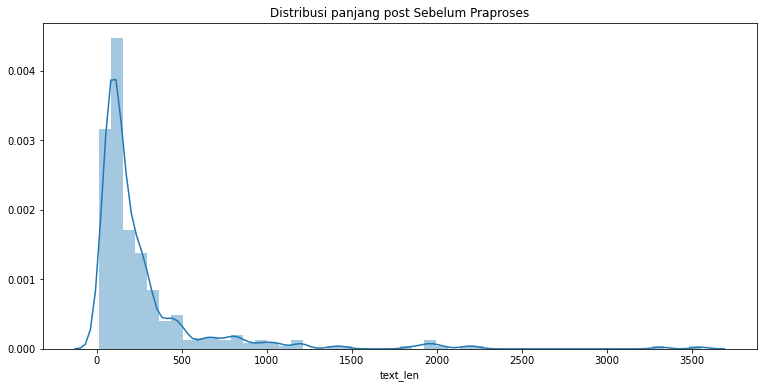

In [ ]:
# Plot the distribution of post length
plt.figure(figsize=(12.8,6))
sns.distplot(dfNonDepresi['text_len']).set_title('Distribusi panjang post Sebelum Praproses')

In [ ]:
dfNonDepresi.text_len.describe()

count     348.000000
mean      283.077586
std       421.276723
min        13.000000
25%        85.000000
50%       144.000000
75%       276.000000
max      3549.000000
Name: text_len, dtype: float64

In [ ]:

len(dfNonDepresi[(dfNonDepresi['text_len'] > 1000) & (dfNonDepresi['text_len'] <= 2500)]) /  len(dfNonDepresi)

0.04310344827586207

In [ ]:
dfNonDepresi = dfNonDepresi[dfNonDepresi['text_len'] <= 1000]
print("Banyak data setelah diseleksi berdasarkan banyak kata: ", len(dfNonDepresi))

Banyak data setelah diseleksi berdasarkan banyak kata:  331


Distribusi pada word count

Text(0.5, 1.0, 'Distribusi banyak kata pada post Sebelum Praproses')

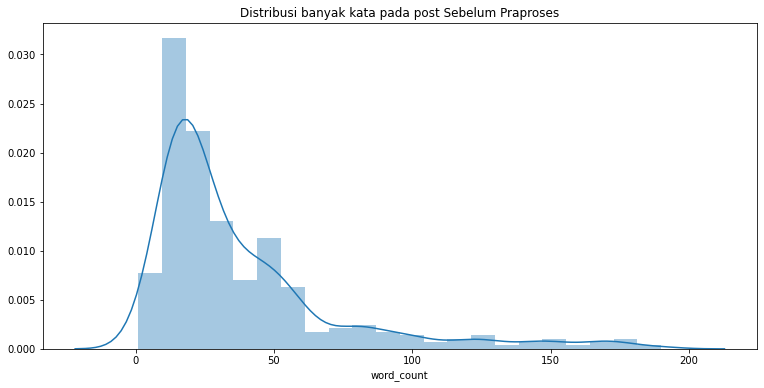

In [ ]:
# Plot the distribution of post length
plt.figure(figsize=(12.8,6))
sns.distplot(dfNonDepresi['word_count']).set_title('Distribusi banyak kata pada post Sebelum Praproses')

In [ ]:
dfNonDepresi['word_count'].describe()

count    331.000000
mean      38.226586
std       35.362195
min        1.000000
25%       16.000000
50%       25.000000
75%       47.000000
max      190.000000
Name: word_count, dtype: float64

In [ ]:
len(dfNonDepresi[dfNonDepresi['word_count'] > 130]) / len(dfNonDepresi)

0.03927492447129909

In [ ]:
dfNonDepresi = dfNonDepresi[dfNonDepresi['word_count'] <= 130]
print("Banyak data setelah diseleksi berdasarkan banyak kata dalam setiap post: ", len(dfNonDepresi))

Banyak data setelah diseleksi berdasarkan banyak kata dalam setiap post:  318


Distribusi pada sentiment polarity non depresi 

Text(0.5, 1.0, 'Distribusi banyak kata pada post Sebelum Praproses')

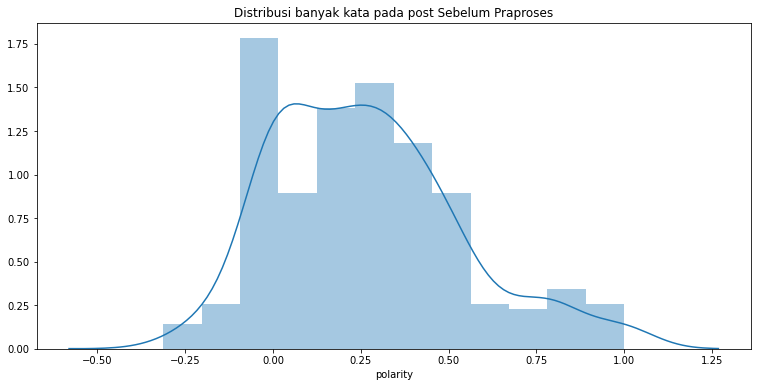

In [ ]:

# Plot the distribution of post length
plt.figure(figsize=(12.8,6))
sns.distplot(dfNonDepresi['polarity']).set_title('Distribusi banyak kata pada post Sebelum Praproses')

In [ ]:

dfNonDepresi = dfNonDepresi[(dfNonDepresi['polarity'] > -0.25)]
print("Banyak data setelah diseleksi berdasarkan polaritas sentimen setiap post: ", len(dfNonDepresi))

Banyak data setelah diseleksi berdasarkan polaritas sentimen setiap post:  317


Menampilkan distribusi dalam unigram, bigram, dan tigram

Membuat model unigram

In [ ]:
def buildUnigramModel(Text):
    words = []
    
    for i, txt in enumerate(Text):
        simbol = '[–—"!@#$%()&+,./;:=“”\\0123456789‘\[\]-]<>*?^`~'
        clean_text = txt
        for smb in simbol:
            clean_text = clean_text.replace(str(smb),'')
        
        words.append(clean_text.lower().split())
    
    words = np.concatenate(words)
    words_count = Counter(words)
    unigramModel = dict(words_count)
    return unigramModel

Membuat model bigram

In [ ]:
def buildBigramModel(Text):
    words = []
    
    for i, txt in enumerate(Text):
        simbol = '[–—|"!@#$%()&+,./;:=“”\'\\0123456789‘\[\]-]<>*?^`~_'
        clean_text = txt
        for smb in simbol:
            clean_text = clean_text.replace(str(smb),'')
        
        words.append(clean_text.lower().split())
    
    words = np.concatenate(words)
    bi_words = [(words[i],words[i+1]) for i in range(len(words)-1)]
    
    words_count = Counter(words)
    bi_words_count = Counter(bi_words)
    
    bigramModel = dict(bi_words_count)       
    
    return bigramModel

unigram

In [ ]:

# Function to get top unigram with stopword
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to get top unigram without stopword
def get_top_n_words_sw(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

bigram

In [ ]:
# Function to get top bigram with stopword
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to get top bigram without stopword
def get_top_n_bigram_sw(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

trigram

In [ ]:

# Get top 20 trigrams function
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Get top 20 trigrams function
def get_top_n_trigram_sw(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

membangun model| unigram dan bigram 

In [ ]:

depresiUnigram = buildUnigramModel(dfDepresi['text'])
sorted_depresiUnigram = dict(sorted(depresiUnigram.items(), key=operator.itemgetter(1),reverse=True))

depresiBigram = buildBigramModel(dfDepresi['text'])
sorted_depresiBigram = dict(sorted(depresiBigram.items(), key=operator.itemgetter(1),reverse=True))

Menampilkan top n-gram sebelum dan sesudah stopwords pada dataset depresi

menampilkan 20 teratas sebelum removing stopwords

In [ ]:
# show top 20 unigram
common_words = get_top_n_words(dfDepresi['text'], 20)

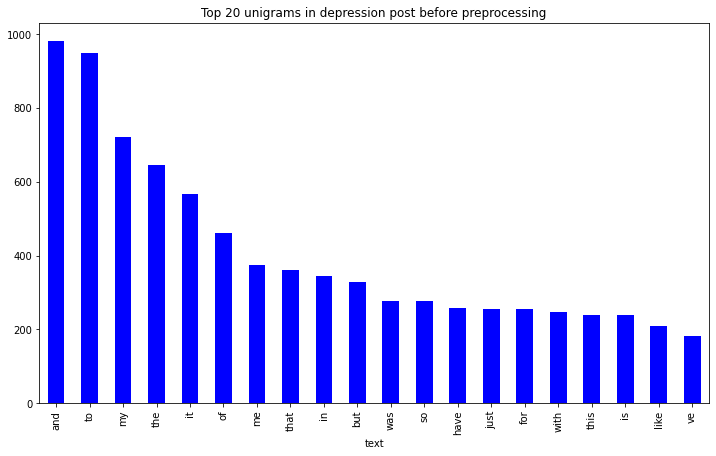

In [ ]:
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 unigrams in depression post before preprocessing', figsize=(12,7))

menampilkan distribusi pada 20 teratas setelah removing stopwords

In [ ]:

# Show top 20 unigrams without stopwords
common_words = get_top_n_words_sw(dfDepresi['text'], 20)

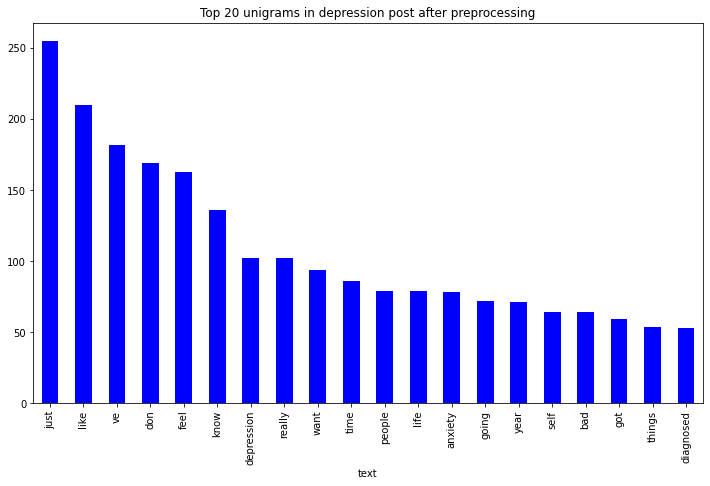

In [ ]:
# Plot the unigram distribution
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 unigrams in depression post after preprocessing', figsize=(12,7))

ditribusi 20 teratas bigram sebelum removing stopwords

In [ ]:
# Show top 20 bigrams 
common_words = get_top_n_bigram(dfDepresi['text'], 20)

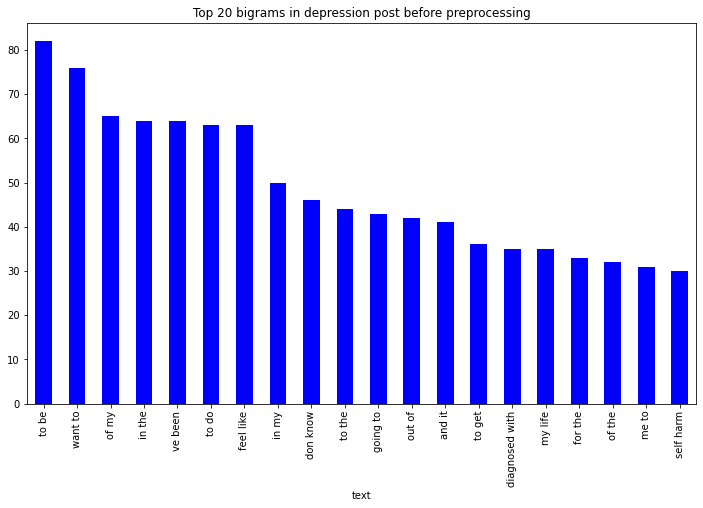

In [ ]:
# Plot the distribution
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 bigrams in depression post before preprocessing', figsize=(12,7))

distribusi 20 teratas bigram setelah removing stopwords

In [ ]:

# Show top 20 bigrams 
common_words = get_top_n_bigram_sw(dfDepresi['text'], 20)

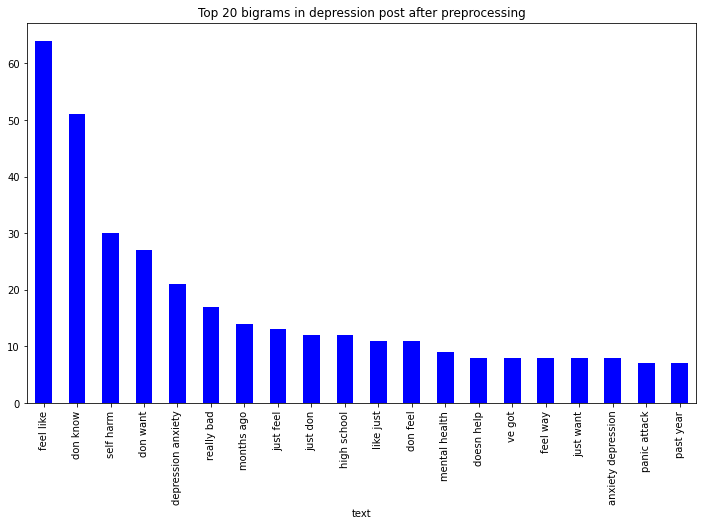

In [ ]:

# Plot the distribution
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 bigrams in depression post after preprocessing', figsize=(12,7))

distribusi 20 teratas trigram sebelum removing stopwords

In [ ]:

# Show top 20 bigrams 
common_words = get_top_n_trigram(dfDepresi['text'], 20)

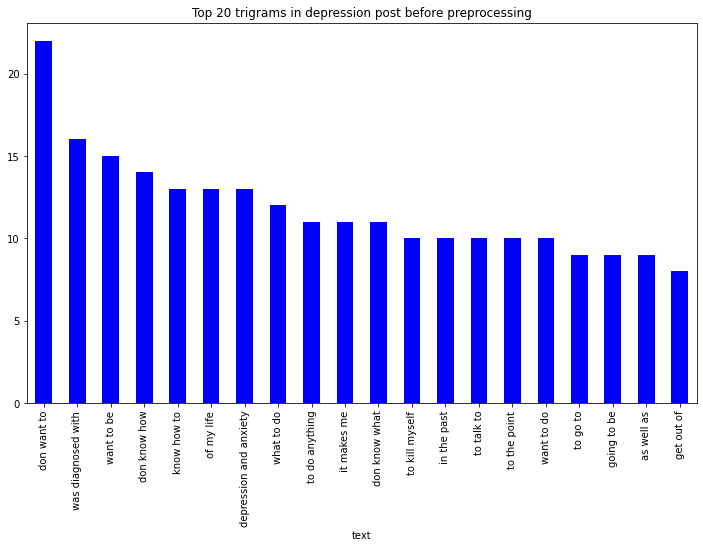

In [ ]:
# Plot the distribution
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 trigrams in depression post before preprocessing', figsize=(12,7))

distribusi 20 teratas trogram setelah removing stowords

In [ ]:
# Show top 20 trigrams 
common_words = get_top_n_trigram_sw(dfDepresi['text'], 20)

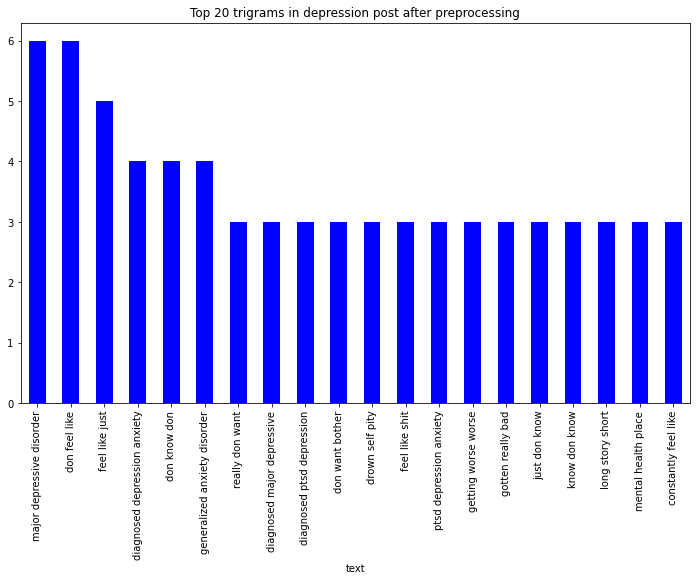

In [ ]:
# Plot the distribution
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 trigrams in depression post after preprocessing', figsize=(12,7))

menampilkan top n-gram sebelum dan sesudah stopword pada dataset non depresi

membangun unigram dan bigram model

In [ ]:

depresiUnigram = buildUnigramModel(dfNonDepresi['text'])
sorted_depresiUnigram = dict(sorted(depresiUnigram.items(), key=operator.itemgetter(1),reverse=True))

depresiBigram = buildBigramModel(dfNonDepresi['text'])
sorted_depresiBigram = dict(sorted(depresiBigram.items(), key=operator.itemgetter(1),reverse=True))

distribusi 20 teratas unigram sebelum removing stopwords

In [ ]:
# show top 20 unigram
common_words = get_top_n_words(dfNonDepresi['text'], 20)

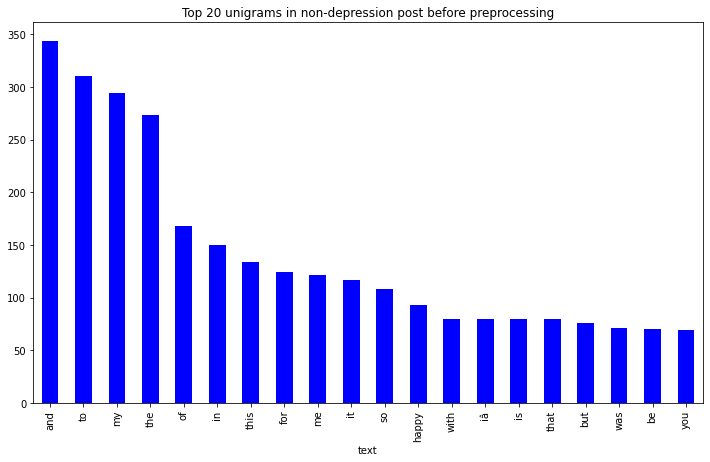

In [ ]:

# Plot the distribution of top 20 unigram
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 unigrams in non-depression post before preprocessing', figsize=(12,7))

distribusi 20 teratas unigram setelah removing stopwords

In [ ]:

# Show top 20 unigrams without stopwords
common_words = get_top_n_words_sw(dfNonDepresi['text'], 20)

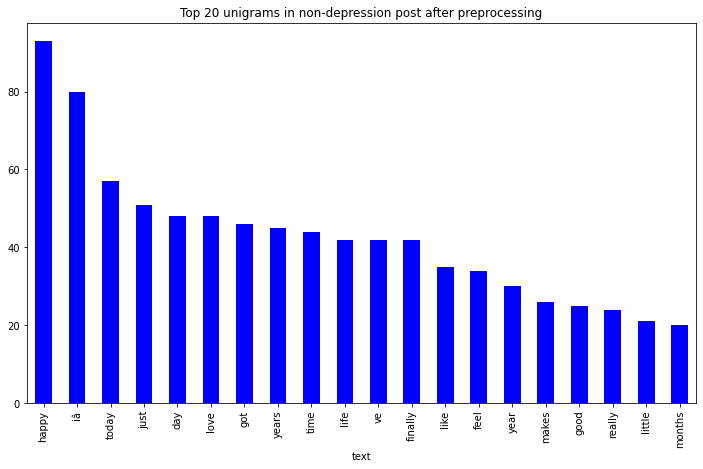

In [ ]:

# Plot the unigram distribution
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 unigrams in non-depression post after preprocessing', figsize=(12,7))

distribusi 20 teratas bigram sebelum removing stopwords

In [ ]:
# Show top 20 bigrams 
common_words = get_top_n_bigram(dfNonDepresi['text'], 20)

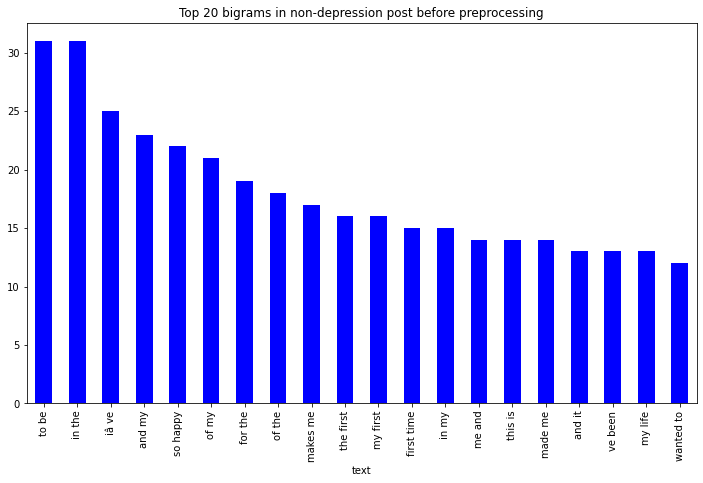

In [ ]:

# Plot the distribution
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 bigrams in non-depression post before preprocessing', figsize=(12,7))

distribusi 20 teratas bigram setelah removing stopwords

In [ ]:

# Show top 20 bigrams 
common_words = get_top_n_bigram_sw(dfNonDepresi['text'], 20)

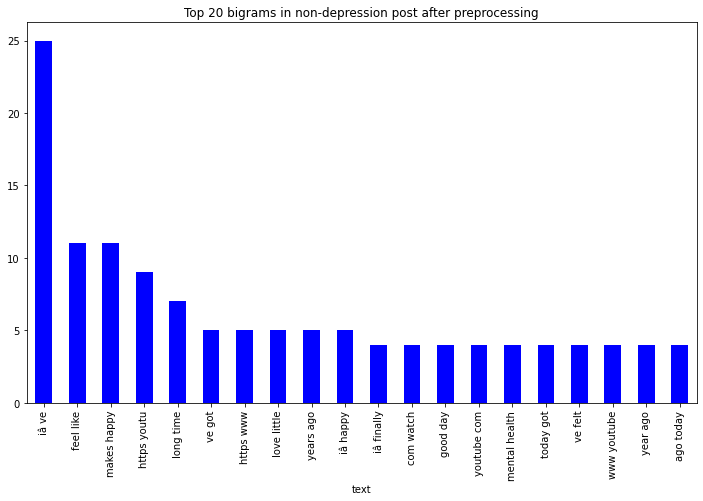

In [ ]:
# Plot the distribution
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 bigrams in non-depression post after preprocessing', figsize=(12,7))

distribusi 20 trigrams sebelum removing stopwords

In [ ]:
# Show top 20 bigrams 
common_words = get_top_n_trigram(dfNonDepresi['text'], 20)

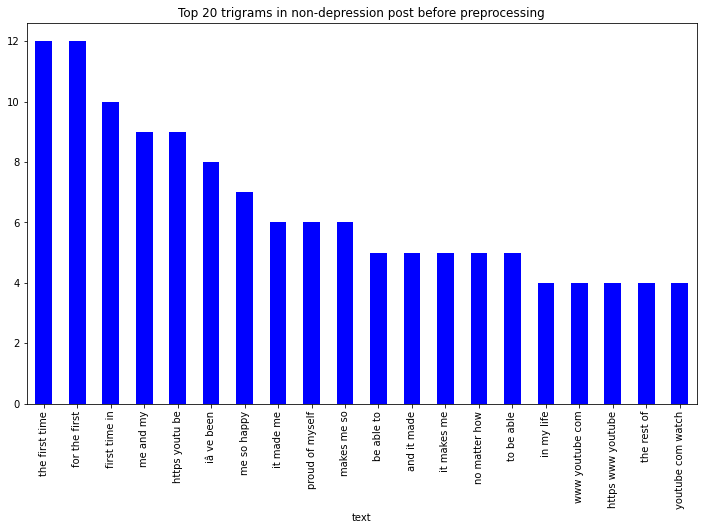

In [ ]:
# Plot the distribution
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 trigrams in non-depression post before preprocessing', figsize=(12,7))

distribusi 20 teratas setelah removing stopwords

In [ ]:

# Show top 20 bigrams 
common_words = get_top_n_trigram_sw(dfNonDepresi['text'], 20)

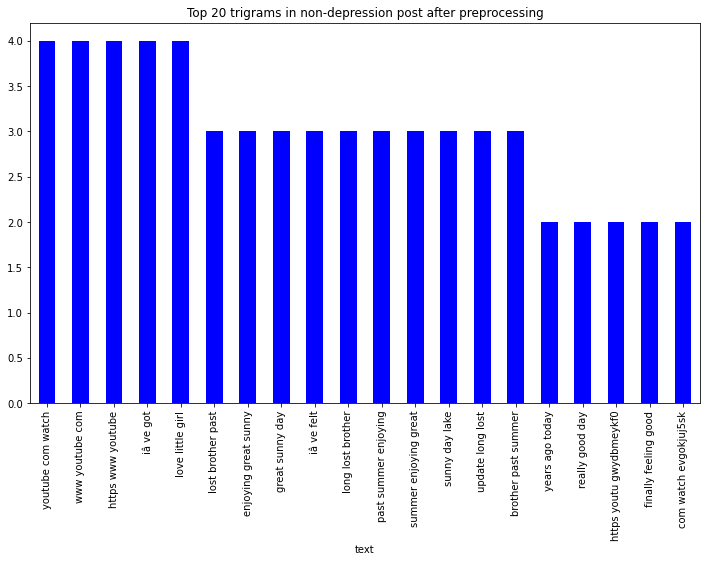

In [ ]:

# Plot the distribution
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='blue', title='Top 20 trigrams in non-depression post after preprocessing', figsize=(12,7))

In [ ]:
# Combine both dataframe
dfDepresiNew = pd.DataFrame(dfDepresi.loc[:,'text'])
# Add columns Label
dfDepresiNew['label'] = 1

In [ ]:
dfNonDepresiNew = pd.DataFrame(dfNonDepresi.loc[:,'text'])
dfNonDepresiNew['label'] = 0

In [ ]:
combined = [dfDepresiNew, dfNonDepresiNew]
dfCombined = pd.concat(combined)
dfCombined = dfCombined.sample(frac=1).reset_index(drop=True)

In [ ]:

persDep = len(dfDepresiNew) / len(dfCombined)
persNonDep = len(dfNonDepresiNew) / len(dfCombined)

print("Persentase data depresi ",persDep)
print("Persentase data non-depresi ",persNonDep)

Persentase data depresi  0.517503805175038
Persentase data non-depresi  0.4824961948249619


In [ ]:
from google.colab import files #library untuk export dari googlecolab
dfCombined.to_csv('dataset_combined_uncleaned.csv')
files.download('dataset_combined_uncleaned.csv')